#Improting necessary libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re as r
%matplotlib inline

##*A quick review of the dataset*

Conversion Rate – The percentage of users who complete a desired action (e.g., purchase, sign-up) after clicking an ad.

Acquisition Cost – The cost of acquiring a new customer through the campaign.

ROI (Return on Investment) – Measures profitability: how much revenue is gained compared to the money spent on ads.

Engagement Score – A metric that shows how much users interact with an ad (likes, comments, shares, etc.).


In [46]:
import pandas as pd
df = pd.read_csv('social.csv')
df.head()

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,$500.00,5.790000,Las Vegas,Spanish,500,3000,7,Health,2022-02-25,Aura Align
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,$500.00,7.210000,Los Angeles,French,500,3000,5,Home,2022-05-12,Hearth Harmony
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,$500.00,0.430000,Austin,Spanish,500,3000,9,Technology,2022-06-19,Cyber Circuit
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,$500.00,0.909824,Miami,Spanish,293,1937,1,Health,2022-09-08,Well Wish
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,$500.00,1.422828,Austin,French,293,1937,1,Home,2022-08-24,Hearth Harmony


##Checking if there any null values in the  columns

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       300000 non-null  int64  
 1   Target_Audience   300000 non-null  object 
 2   Campaign_Goal     300000 non-null  object 
 3   Duration          300000 non-null  object 
 4   Channel_Used      300000 non-null  object 
 5   Conversion_Rate   300000 non-null  float64
 6   Acquisition_Cost  300000 non-null  object 
 7   ROI               300000 non-null  float64
 8   Location          300000 non-null  object 
 9   Language          300000 non-null  object 
 10  Clicks            300000 non-null  int64  
 11  Impressions       300000 non-null  int64  
 12  Engagement_Score  300000 non-null  int64  
 13  Customer_Segment  300000 non-null  object 
 14  Date              300000 non-null  object 
 15  Company           300000 non-null  object 
dtypes: float64(2), int64

In [48]:
df.isnull().sum()

,0
Campaign_ID,0
Target_Audience,0
Campaign_Goal,0
Duration,0
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,0
ROI,0
Location,0
Language,0


# Basic Statistics Summary

The `df.describe()` function provides a statistical summary of the numerical columns in the dataset, including metrics such as mean, standard deviation, minimum, and maximum values. This helps us understand the overall distribution and central tendencies of the data, which is crucial for identifying patterns, outliers, and potential data issues.


In [49]:
df.describe()


,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,550444.804487,0.080009,3.177691,18153.670370,56034.236387,4.369217
std,260252.586037,0.040563,2.461200,11027.023294,32583.136334,3.156492
min,100001.000000,0.010000,0.000000,293.000000,1937.000000,1.000000
25%,325003.500000,0.050000,0.930000,8821.000000,28362.000000,1.000000
50%,551164.500000,0.080000,2.670000,17230.000000,54098.000000,4.000000
75%,776284.500000,0.110000,5.330000,26808.000000,80925.250000,7.000000
max,999998.000000,0.150000,8.000000,40000.000000,120000.000000,10.000000


## Correlation between Clicks and Impressions:


We calculate the correlation between the 'Clicks' and 'Impressions' columns using `df[['Clicks', 'Impressions']].corr()`. This is done to examine the relationship between these two variables. Understanding this correlation is important because it can provide insights into how impressions drive clicks, which can be useful for optimizing ad campaigns.


In [50]:
df[['Clicks','Impressions']].corr()

,Clicks,Impressions
Clicks,1.000000,0.998769
Impressions,0.998769,1.000000



# Click-Through Rate (CTR)

The CTR (Click-Through Rate) is calculated as the percentage of users who saw an ad and clicked on it. A higher CTR indicates a more engaging ad campaign, as more users are interacting with the ad after seeing it. This metric is essential for assessing the effectiveness of marketing campaigns and optimizing ad strategies.

In [51]:
df['CTR']=(df['Clicks']/df['Impressions'])*100

In [52]:
df

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company,CTR
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,$500.00,5.790000,Las Vegas,Spanish,500,3000,7,Health,2022-02-25,Aura Align,16.666667
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,$500.00,7.210000,Los Angeles,French,500,3000,5,Home,2022-05-12,Hearth Harmony,16.666667
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,$500.00,0.430000,Austin,Spanish,500,3000,9,Technology,2022-06-19,Cyber Circuit,16.666667
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,$500.00,0.909824,Miami,Spanish,293,1937,1,Health,2022-09-08,Well Wish,15.126484
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,$500.00,1.422828,Austin,French,293,1937,1,Home,2022-08-24,Hearth Harmony,15.126484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,565525,Men 25-34,Market Expansion,60 Days,Instagram,0.14,$15000.00,4.950000,Los Angeles,English,39999,119998,7,Technology,2022-10-17,Code Crafters,33.333056
299996,539680,Women 25-34,Market Expansion,60 Days,Instagram,0.08,$15000.00,3.410000,Austin,Spanish,39999,119998,8,Technology,2022-02-25,Innovate Infinity,33.333056
299997,140032,Women 35-44,Brand Awareness,60 Days,Pinterest,0.09,$15000.00,0.904461,Miami,French,23492,77476,1,Food,2022-10-02,Gastronomy Guild,30.321648
299998,161067,Women 18-24,Market Expansion,60 Days,Instagram,0.13,$15000.00,7.430000,Las Vegas,Spanish,39999,119999,10,Food,2022-01-24,Savor Street,33.332778


# Data Distribution and Outliers

We examine the distribution of the data to check for any outliers. This is done to ensure that the data is within a reasonable range and that extreme values don't skew our analysis. Identifying outliers is a critical step in data cleaning and can help in better modeling and decision-making.





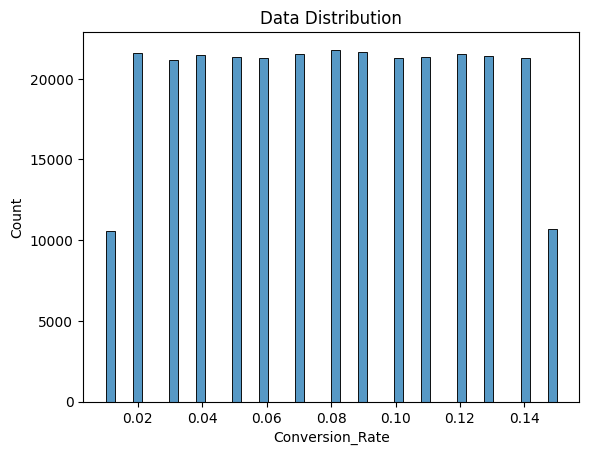

In [ ]:
sns.histplot(df['Conversion_Rate'],bins=50,kde=False)
plt.title('Data Distribution')
plt.show()

### A/B Testing Analysis
### Compare conversion rates of two groups (A & B) using a statistical test t-test.
### Visualize results using bar charts.

🔹 Why Do We Use the t-test?
A t-test is used to compare the means of two groups and check if their difference is statistically significant. In A/B testing, this helps answer questions like:

Did Campaign A generate significantly more conversions than Campaign B?

Did the new website design increase user engagement compared to the old one?

Without a statistical test, you might see a difference, but you won't know if it happened by chance or if it's a real effect.

🔹 What is the p-value?

The p-value tells us the probability that the observed difference is due to chance rather than a real effect.

If p-value < 0.05 (or another chosen threshold), we reject the null hypothesis (which assumes there’s no difference between A and B). This means the difference is statistically significant.

If p-value > 0.05, we fail to reject the null hypothesis, meaning there's not enough evidence to say the two groups are different.

In [ ]:

group_A=df[df['Channel_Used']=='Facebook']
group_B=df[df['Channel_Used']=='Instagram']

In [ ]:
print('Facebook Conversion Rate', group_A['Conversion_Rate'].mean())
print('Instagram Conversion Rate', group_B['Conversion_Rate'].mean())

Facebook Conversion Rate 0.07987001756159864
Instagram Conversion Rate 0.07976431738592031


In [ ]:
import scipy.stats as stats

In [ ]:
t_stat, p_value=stats.ttest_ind(group_A['Conversion_Rate'],group_B['Conversion_Rate'])
print(f"T-statistics' {t_stat},'P_value' {p_value}")

if p_value<0.05:
    print('Significant difference found: One platform converts better!')
else:
    print('No significant difference: Both platforms perform similarly')

T-statistics' 0.5046857468375112,'P_value' 0.613780313603102
No significant difference: Both platforms perform similarly


## Instagram vs. Pinterest A/B Testing

In [ ]:
group_C=df[df['Channel_Used']=='Pinterest']

In [ ]:
print('Pinterest Conversion Rate',group_C['Conversion_Rate'].mean())

Pinterest Conversion Rate 0.08004222050558059


In [ ]:
t_stat, p_value=stats.ttest_ind(group_B['Conversion_Rate'],group_C['Conversion_Rate'])
print(f"T-statistics' {t_stat},\n'P_value' {p_value}")

if p_value<0.05:
    print('Significant difference found: One platform converts better!')
else:
    print('No significant difference: Both platforms perform similarly')

T-statistics' -1.3263696725158618,
'P_value' 0.1847192961676917
No significant difference: Both platforms perform similarly


# Facebook vs. Twitter

In [ ]:
group_D=df[df['Channel_Used']=='Twitter']

In [ ]:
print('Twitter Conversion Rate', group_D['Conversion_Rate'].mean())

Twitter Conversion Rate 0.08036328077907118


In [ ]:
t_stat,p_value=stats.ttest_ind(group_A['Conversion_Rate'],group_D['Conversion_Rate'])
print(f"T-Statistics {t_stat},\nP-value {p_value}")

if p_value<0.05:
    print("Signifince difference found : One platform converts better !")
else:
    print('No significant difference: Both platforms perform similarly ')


T-Statistics -2.3554804509616853,
P-value 0.01850005193452198
Signifince difference found : One platform converts better !


#### Pinterest vs. Twitter Conversion rate difference

In [ ]:
t_test,p_value=stats.ttest_ind(group_D['Conversion_Rate'],group_C['Conversion_Rate'])
print(f'T-test {t_test},\n P-value {p_value}')

if p_value<0.05:
    print('Signifince difference found : One platform converts better !')
else:
    print('No significant difference: Both platforms perform similarly ')

T-test 1.5325461732534187,
 P-value 0.12538982530932097
No significant difference: Both platforms perform similarly 


### Facebook vs Pinterest Conversion rate difference


In [ ]:
t_test,p_value=stats.ttest_ind(group_A['Conversion_Rate'],group_D['Conversion_Rate'])
print(f'T-test: {t_test} ,\n P-value {p_value}')

if p_value<0.05:
    print('Signifince difference found one platform is better')
else:
    print('no significant difference:both platforms perform similarly')

T-test: -2.3554804509616853 ,
 P-value 0.01850005193452198
Signifince difference found one platform is better


## Attribution Model Analysis
Determine which marketing channels lead to the most conversions.

In [ ]:
df.head()

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company,CTR
0,529013,Men 35-44,Product Launch,15 Days,Instagram,0.15,500.0,5.790000,Las Vegas,Spanish,500,3000,7,Health,2022-02-25,Aura Align,16.666667
1,275352,Women 45-60,Market Expansion,15 Days,Facebook,0.01,500.0,7.210000,Los Angeles,French,500,3000,5,Home,2022-05-12,Hearth Harmony,16.666667
2,692322,Men 45-60,Product Launch,15 Days,Instagram,0.08,500.0,0.430000,Austin,Spanish,500,3000,9,Technology,2022-06-19,Cyber Circuit,16.666667
3,675757,Men 25-34,Increase Sales,15 Days,Pinterest,0.03,500.0,0.909824,Miami,Spanish,293,1937,1,Health,2022-09-08,Well Wish,15.126484
4,535900,Men 45-60,Market Expansion,15 Days,Pinterest,0.13,500.0,1.422828,Austin,French,293,1937,1,Home,2022-08-24,Hearth Harmony,15.126484


In [69]:
channel_conversions=df.groupby('Channel_Used')['Conversion_Rate'].mean().sort_values(ascending=0)
channel_conversions

,Conversion_Rate
Channel_Used,
Twitter,0.080363
Pinterest,0.080042
Facebook,0.079870
Instagram,0.079764


In [71]:
colors = ['#FF5733', '#33FF57', '#3357FF', '#F1C40F', '#9B59B6']

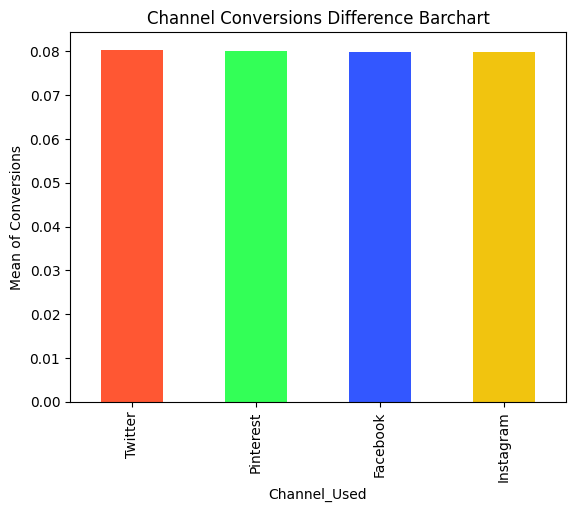

In [72]:
channel_conversions.plot(kind='bar',color=colors)
plt.title('Channel Conversions Difference Barchart')
plt.ylabel('Mean of Conversions')
plt.show()

## Customer Segmentation Insights

Which segment has the highest engagement?

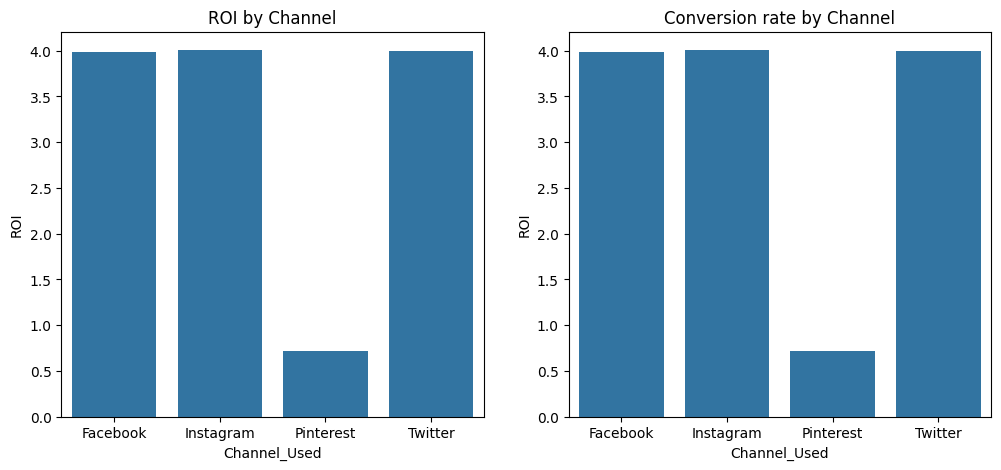

In [57]:
df_grouped=df.groupby('Channel_Used').agg({'ROI':'mean','Conversion_Rate':'mean'}).reset_index()
fig,ax=plt.subplots(1,2,figsize=(12,5))
sns.barplot(x='Channel_Used',y='ROI',data=df_grouped,ax=ax[0])
ax[0].set_title('ROI by Channel')

sns.barplot(x='Channel_Used',y='ROI',data=df_grouped,ax=ax[1])
ax[1].set_title('Conversion rate by Channel')

plt.show()

In [58]:
df_grouped=df.groupby('Customer_Segment')['Engagement_Score'].mean().reset_index()
df_grouped

,Customer_Segment,Engagement_Score
0,Fashion,4.379062
1,Food,4.365020
2,Health,4.384532
3,Home,4.348852
4,Technology,4.368633


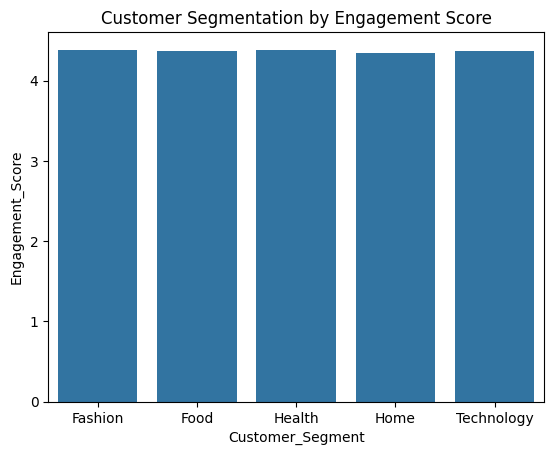

In [59]:
df_grouped=df.groupby('Customer_Segment')['Engagement_Score'].mean().reset_index()
sns.barplot(x='Customer_Segment',y='Engagement_Score',data=df_grouped)
plt.title('Customer Segmentation by Engagement Score')
plt.show()

In [ ]:
con_grouped=df.groupby('Customer_Segment')['Conversion_Rate'].mean().reset_index()
con_grouped

,Customer_Segment,Conversion_Rate
0,Fashion,0.080100
1,Food,0.079913
2,Health,0.079935
3,Home,0.080045
4,Technology,0.080054


In [ ]:
impression_grouped=df.groupby('Channel_Used')['Conversion_Rate'].mean().reset_index()
impression_grouped

,Channel_Used,Conversion_Rate
0,Facebook,0.079870
1,Instagram,0.079764
2,Pinterest,0.080042
3,Twitter,0.080363


In [ ]:
impression_grouped=df.groupby('Channel_Used')['Acquisition_Cost'].mean().reset_index()
impression_grouped

,Channel_Used,Acquisition_Cost
0,Facebook,7745.022816
1,Instagram,7726.252813
2,Pinterest,7769.738763
3,Twitter,7774.121680


# Acquisition Cost Calculation

The `df['Acquisition_Cost'] = df['Acquisition_Cost'].replace(r'\$','',regex=True)` code is used to remove the dollar signs from the 'Acquisition_Cost' column to make the values numeric. Then, we use `pd.to_numeric()` to ensure that the column is in a proper numerical format for further analysis. This is important because accurate numeric data is required for calculations, comparisons, and visualizations.


In [60]:
df['Acquisition_Cost']=df['Acquisition_Cost'].replace(r'\$','',regex=True)
df['Acquisition_Cost'] = pd.to_numeric(df['Acquisition_Cost'])


In [61]:
df.groupby('Duration')['Acquisition_Cost'].mean()

,Acquisition_Cost
Duration,
15 Days,2166.803859
30 Days,5936.126131
45 Days,9571.252664
60 Days,13340.820531


#### Identify Which Platforms Have the Highest Engagement



In [64]:
df.groupby('Channel_Used')['Engagement_Score'].mean().sort_values(ascending=False)

,Engagement_Score
Channel_Used,
Instagram,5.507650
Twitter,5.495760
Facebook,5.478394
Pinterest,1.000000


## finding which channel has the  highest ctr

<ipython-input-65-71fadf2f5283>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ctr_channel,x='Channel_Used',y='CTR',palette='viridis')


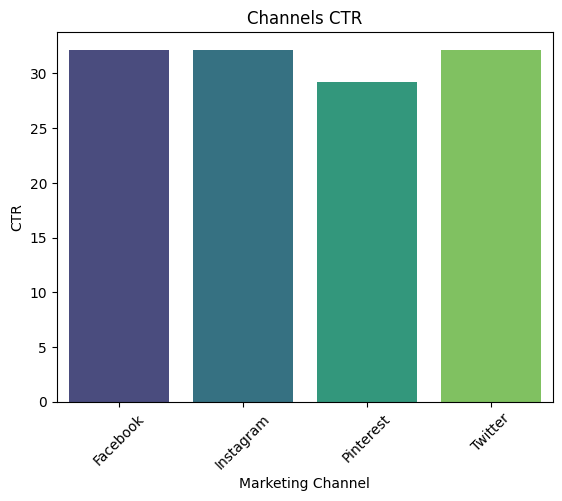

In [65]:
ctr_channel=df.groupby('Channel_Used',as_index=False)['CTR'].mean()
sns.barplot(data=ctr_channel,x='Channel_Used',y='CTR',palette='viridis')
plt.title('Channels CTR')
plt.xlabel('Marketing Channel')
plt.ylabel('CTR')
plt.xticks(rotation=45)
plt.show()

# Maximum Clicks Observation

The code `df[df['Clicks'] == df['Clicks'].max()]` is used to find the row with the maximum number of clicks. This helps in identifying the campaign that received the most engagement, which can be useful for further analysis of what made this campaign successful.


In [ ]:
df[df['Clicks']==df['Clicks'].max()]


,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Company,CTR
299999,420183,Men 25-34,Brand Awareness,60 Days,Facebook,0.08,15000.0,1.9,Miami,English,40000,120000,10,Technology,2022-07-18,Innovate Infinity,33.333333


# Acquisition Cost by Company

The code showen below groups the dataset by 'Company' and sums the 'Acquisition_Cost' for each company. This is useful for comparing the total acquisition costs across different companies and identifying which companies are spending more on acquiring customers.




In [67]:
df.groupby('Company')[['Acquisition_Cost']].sum().sort_values(by='Acquisition_Cost',ascending=False)


,Acquisition_Cost
Company,
Space Spruce,47942770.03
Tech Titans,47836719.11
Balance Beam,47640328.83
Dine Divine,47435980.88
Vigor Valley,47252992.37
Attire Artistry,47241751.14
Palate Paradise,47216962.97
Nest Neat,47203363.32
Code Crafters,47110009.70


# Campaigns Grouped by Language and Location

The code `df.groupby(['Language', 'Location'])[['Campaign_ID']].count()` is used to count the number of campaigns grouped by 'Language' and 'Location'. This provides a breakdown of how campaigns are distributed across different languages and locations. It is useful for understanding the geographical and linguistic distribution of the campaigns.

Similarly, the `location_count` variable is used to count the campaigns by location to determine where the majority of campaigns are concentrated.


In [53]:
df.groupby(['Language','Location'])[['Campaign_ID']].count().sort_values(by='Language',ascending=0)

Campaign_ID
Language Location                
Spanish  Austin             20012
         Las Vegas          20043
         Los Angeles        20347
         Miami              19894
         New York           19774
French   Austin             19838
         Las Vegas          19676
         Los Angeles        20070
         Miami              20141
         New York           20089
English  Austin             19999
         Las Vegas          20010
         Los Angeles        19905
         Miami              20206
         New York           19996

# Location Count

In [54]:
location_count=df.groupby('Location')[['Campaign_ID']].count().sort_values(by='Campaign_ID',ascending=0)
location_count

,Campaign_ID
Location,
Los Angeles,60322
Miami,60241
New York,59859
Austin,59849
Las Vegas,59729


<ipython-input-55-fca455b13030>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_count,x='Location',y='Campaign_ID',palette='viridis')


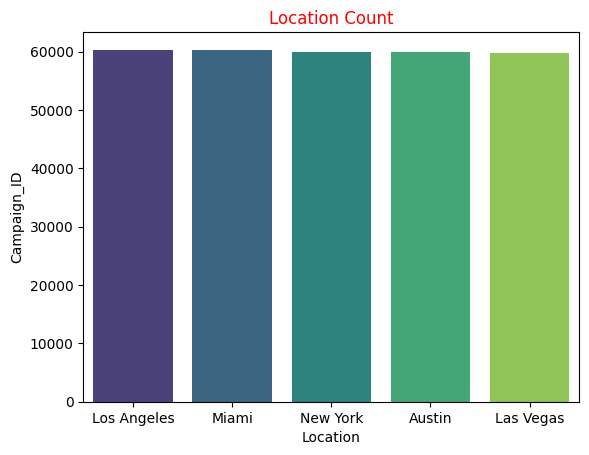

In [55]:
sns.barplot(data=location_count,x='Location',y='Campaign_ID',palette='viridis')
plt.title('Location Count',color='r')
plt.show()